# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_csv('CHURN_TELECON_MOD08_TRATADO.csv', delimiter=',')
df.head()

,customerID,Gender,Aged,Married,Dependents,Time_Customer,PhoneService,Internet_Service,Security_Service,Technical_Support,StreamingTV,Contract_Type,PaymentMethod,Monthly_Payment,Total_Paid,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No,No,One year,Mailed check,NaN,1022.95,No


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [3]:
df.describe()

,Aged,Time_Customer,Monthly_Payment,Total_Paid
count,2488.000000,2488.000000,2175.000000,2488.000000
mean,0.161576,32.352090,65.607563,2290.087178
std,0.368135,24.636885,29.931520,2264.585643
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,8.000000,39.500000,402.337500
50%,0.000000,29.000000,71.450000,1402.900000
75%,0.000000,56.000000,90.250000,3867.162500
max,1.000000,72.000000,118.650000,8564.750000


Com a função describe já podemos identificar possíveis outliers nas colunas 'Monthly_Payment' e 'Total_Paid'

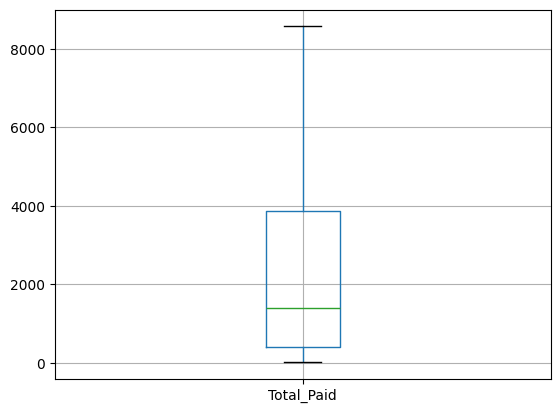

In [4]:
df.boxplot(column='Total_Paid')
plt.show()

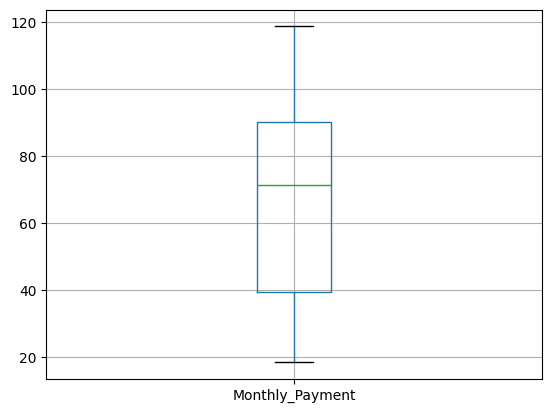

In [5]:
df.boxplot(column='Monthly_Payment')
plt.show()

Com a visualização dos dois gráficos, podemos ver que os dados não estão bem distribuídos. Enquanto a coluna 'Monthly_Payment' está com a maioria das observações concentradas nos valores inferiores da escala, a coluna 'Total_Paid' está com a maior parte dos dados com predominância de registros nos valores superiores.

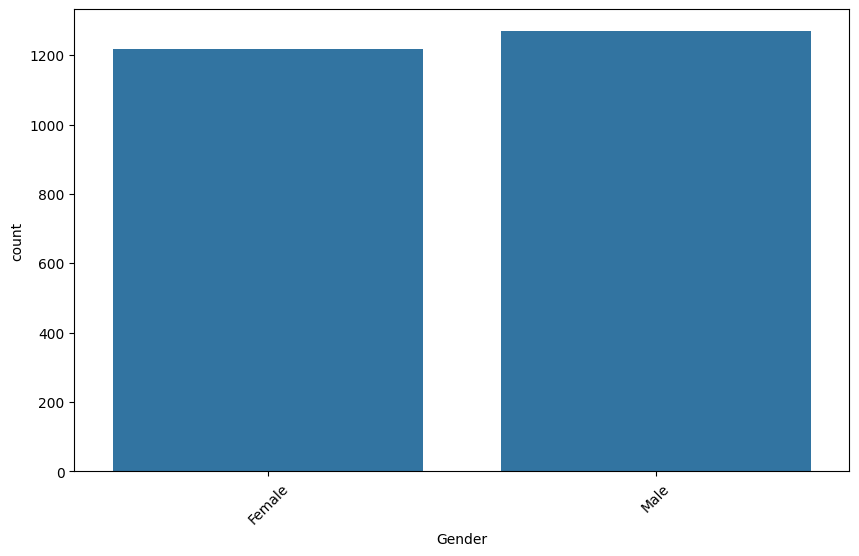

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Gender')
plt.xticks(rotation=45)
plt.show()

Com este gráfico vemos que temos uma boa distribuição de gênero na nossa base de dados.

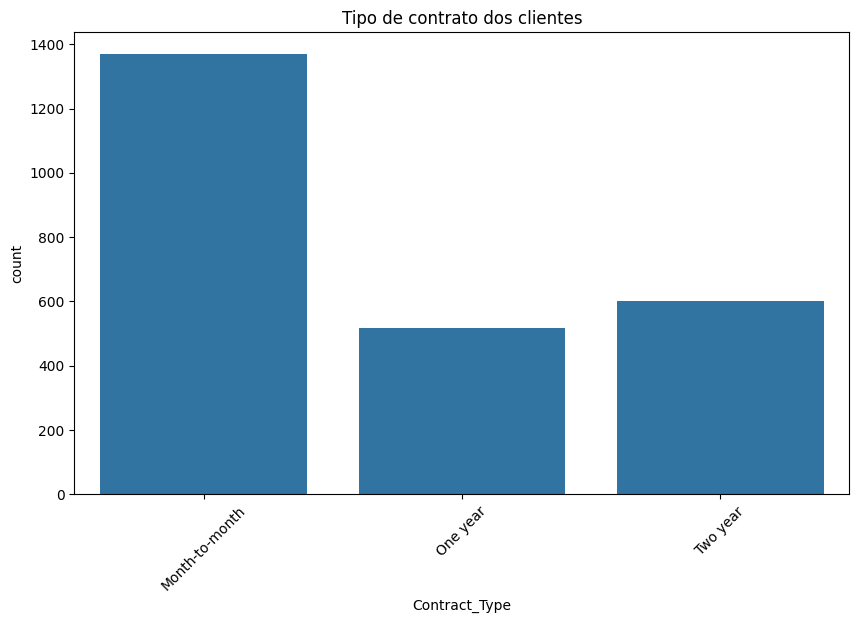

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Contract_Type')
plt.title('Tipo de contrato dos clientes')
plt.xticks(rotation=45)
plt.show()

Podemos ver que a maior parte dos clientes tem um contrato mês-a-mês. O que poderíamos sugerir uma ação para aumentar os contratos anuais e bi-anuais, podendo reter o cliente por mais tempo.

<Figure size 1000x600 with 0 Axes>

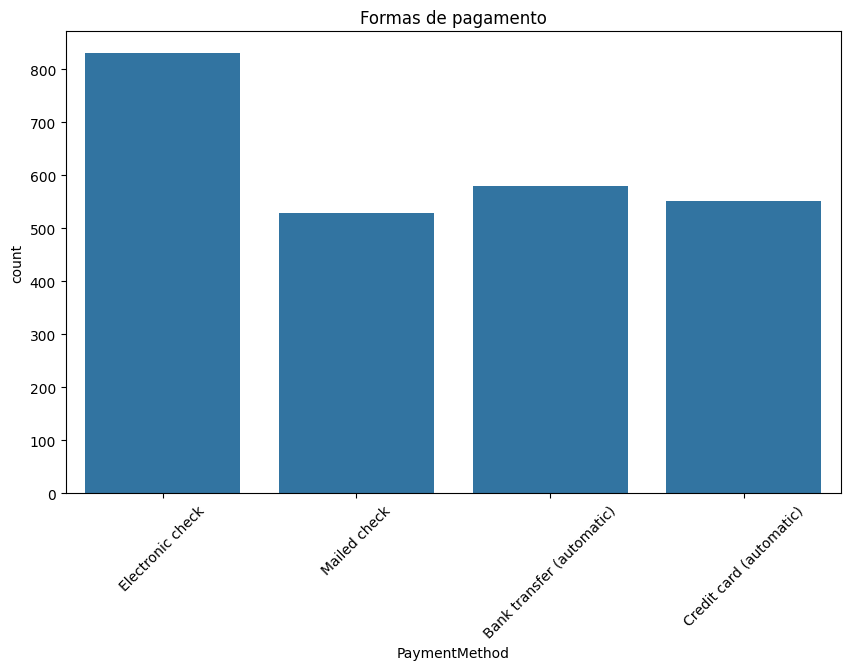

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='PaymentMethod')
plt.title('Formas de pagamento')
plt.xticks(rotation=45)
plt.show()

A maior parte dos clientes utiliza Eletronic check, as outras formas de pagamento estão bem próximas entre si.

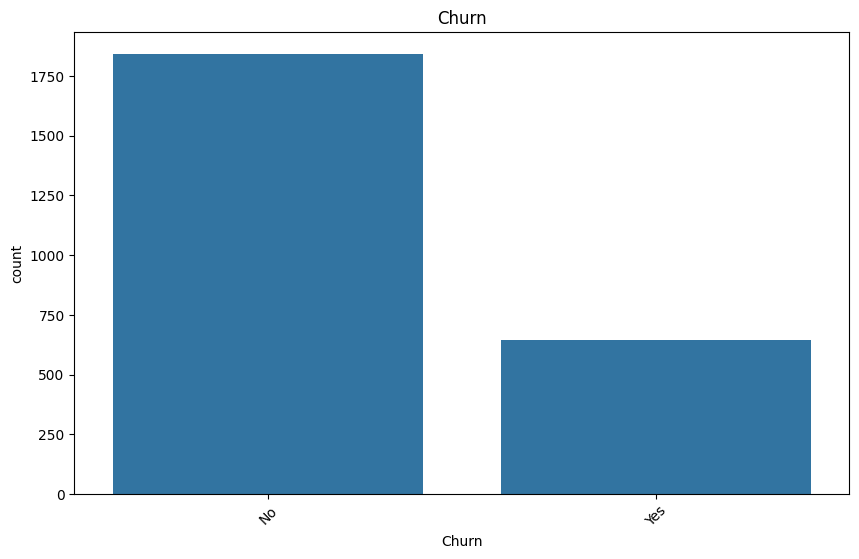

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Churn')
plt.title('Churn')
plt.xticks(rotation=45)
plt.show()

A predominância da base de dados é de clientes que não abandonaram a empresa, o que pode causar um vies ao utilizar um Machine Learning para previsão.

In [18]:
contagem_aged = df['Aged'].value_counts()

# Calculando a porcentagem
(contagem_aged/contagem_aged.sum()) * 100

Aged
0    83.842444
1    16.157556
Name: count, dtype: float64

A variável Booleana 'Aged' está desbalanceada, com uma minoria dos clientes sendo idosos.

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


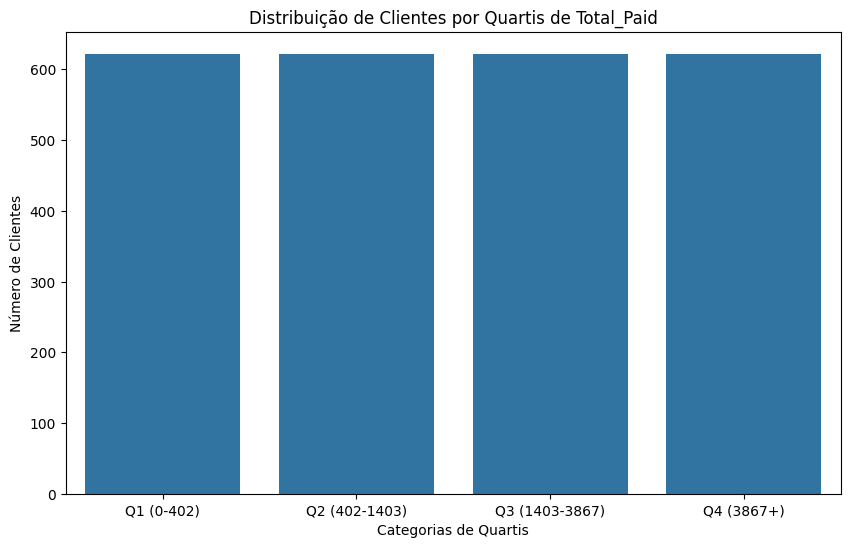

In [25]:

Q1 = df['Total_Paid'].quantile(0.25) 
Q2 = df['Total_Paid'].quantile(0.50)  
Q3 = df['Total_Paid'].quantile(0.75)  

# Criando categorias baseadas em quartis
df['Total_Paid_Category'] = pd.cut(df['Total_Paid'],
                                  bins=[0, Q1, Q2, Q3, np.inf],
                                  labels=['Q1 (0-402)', 'Q2 (402-1403)', 
                                          'Q3 (1403-3867)', 'Q4 (3867+)'])


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Total_Paid_Category', order=df['Total_Paid_Category'].value_counts().index)
plt.title('Distribuição de Clientes por Quartis de Total_Paid')
plt.xlabel('Categorias de Quartis')
plt.ylabel('Número de Clientes')
plt.show()


A coluna 'Total_Paid' será mantida, pois a distribuição entre os quartis está simétrica.

In [26]:
df['Monthly_Payment'].median()

np.float64(71.45)

In [27]:
df['Monthly_Payment'].mean()

np.float64(65.60756321839081)

A coluna 'Monthly_Payment' também não sofrerá alteração, pois a média e mediana estão próximas. O que poderia justificar a concentração de dados nos valores inferiores seria a maior adesão a planos mais básicos.

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

O tempo de utilização impacta no abandono?

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

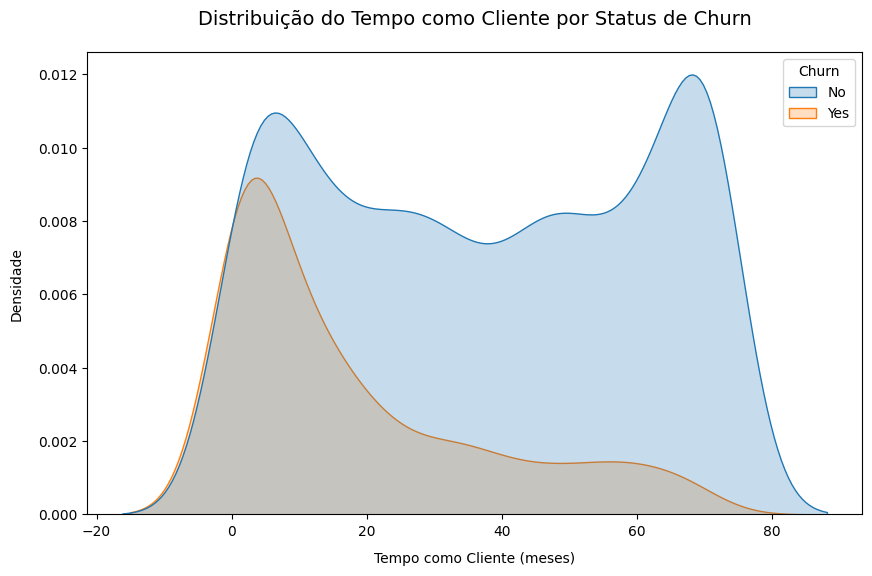

In [33]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Time_Customer', hue='Churn', fill=True)
plt.title('Distribuição do Tempo como Cliente por Status de Churn', fontsize=14, pad=20)
plt.xlabel('Tempo como Cliente (meses)', labelpad=10)
plt.ylabel('Densidade', labelpad=10)
plt.show()

Os dados demonstram que clientes com Churn tem menos tempo utilizando os serviços da empresa. Onde novamente reforça que aumentar os contratos de um e dois anos poderia diminuir o abandono.

A forma de pagamento está relacionada com o Churn?

In [46]:
fig = px.histogram(df, x='Churn', color='PaymentMethod', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Churn e Forma de pagamento',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Forma de pagamento')
fig.show()

Com a análise do gráfico podemos notar que a maior parte dos clientes com Churn utiliza como forma de pagamento o Eletronic check. Enquanto os que não possuem Churn utilizam mais o Bank transfer ou Credit Card.

O Churn está relacionado com o Phone Service?

In [61]:

fig = px.histogram(df, x='Churn', color='PhoneService', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Churn e Phone Service',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Phone Service')
fig.show()

Podemos notar que aparentemente o serviço telefônico não está impactando o Churn.

E o serviço de internet?

In [63]:

fig = px.histogram(df, x='Churn', color='Internet_Service', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Churn e Internet Service',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Internet Service')
fig.show()

Já no serviço de internet, os clientes com Churn utilizavam em sua maioria a fibra ótica. O que indica que poderiámos ter alguma ação focada nesse serviço, como melhoria do produto ou oferta do tipo DSL.

Os clientes com serviço de segurança tendem a abandonar a empresa?

In [65]:
fig = px.histogram(df, x='Churn', color='Security_Service', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Churn e Security Service',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Security Service')
fig.show()

Grande parte dos clientes com Churn não tinham o Security Service, o que pode trazer como forma de retenção a oferta deste serviço.